In [47]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/stud.csv')
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


**math_score** is dependent variable

In [6]:
X = df.drop(columns=['math_score'])
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [7]:
y = df['math_score']

### Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((700, 7), (300, 7))

### Column transformer

In [11]:
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='str').columns

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_features),
        ('standardize', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

In [20]:
X_train_conv = preprocessor.fit_transform(X_train)
X_test_conv = preprocessor.transform(X_test)

## Model Training

In [24]:
def evaluate(y_actual, y_pred):
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    score = r2_score(y_actual, y_pred)

    return mse, mae, score

In [26]:
models = {
    'linear': LinearRegression(),
    'lasso': Lasso(),
    'ridge': Ridge(),
    'svr': SVR(),
    'knn': KNeighborsRegressor(),
    'random_forest': RandomForestRegressor(),
    'decision_tree': DecisionTreeRegressor(),
    'adaboost': AdaBoostRegressor(),
    'gradient_boost': GradientBoostingRegressor(),
    'xgboost': XGBRegressor(),
    'catboost': CatBoostRegressor(verbose=False)
}

r2_list = {}
for name, model in models.items():
    model.fit(X_train_conv, y_train)

    y_pred_train = model.predict(X_train_conv)
    y_pred_test = model.predict(X_test_conv)

    mse_train, mae_train, score_train = evaluate(y_train, y_pred_train)
    mse_test, mae_test, score_test = evaluate(y_test, y_pred_test)
    r2_list[name] = score_test

    print('='*40)
    print(f'Model name: {name}')
    print(f'On training: ')
    print(f'MSE: {mse_train}')
    print(f'MAE: {mae_train}')
    print(f'R squared score: {score_train}')
    print('-'*40)

    print(f'On testing: ')
    print(f'MSE: {mse_test}')
    print(f'MAE: {mae_test}')
    print(f'R squared score: {score_test}')
    print('='*40)
    print()

Model name: linear
On training: 
MSE: 27.544689325007596
MAE: 4.198519565142324
R squared score: 0.8751313605993936
----------------------------------------
On testing: 
MSE: 30.88659318807304
MAE: 4.4182613202973124
R squared score: 0.8758630443016735

Model name: lasso
On training: 
MSE: 42.308863096055795
MAE: 5.153151290773054
R squared score: 0.8082007712247248
----------------------------------------
On testing: 
MSE: 47.13295069392751
MAE: 5.387877784796949
R squared score: 0.8105669674672037

Model name: ridge
On training: 
MSE: 27.550293693984234
MAE: 4.19792700571419
R squared score: 0.8751059542526183
----------------------------------------
On testing: 
MSE: 30.91537826432824
MAE: 4.417522961433931
R squared score: 0.875747353596839

Model name: svr
On training: 
MSE: 47.61038020296986
MAE: 5.0432536121473825
R squared score: 0.784167346120947
----------------------------------------
On testing: 
MSE: 71.08332301418503
MAE: 5.806762833215483
R squared score: 0.7143075228086

#### Insights
- We show that Linear regression very well on the dataset

In [29]:
len(r2_list.values())

11

In [30]:
len(r2_list.keys())

11

In [40]:
performance_df = pd.DataFrame(
    data=r2_list.values(),
    index=r2_list.keys(),
    columns=['R2_score']
).sort_values(by=['R2_score'], ascending=False)

performance_df

,R2_score
linear,0.875863
ridge,0.875747
gradient_boost,0.863839
catboost,0.850768
random_forest,0.847532
adaboost,0.833768
xgboost,0.820321
lasso,0.810567
knn,0.776536
decision_tree,0.743446


## Linear Regression

In [41]:
linear = LinearRegression()
linear.fit(X_train_conv, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
y_pred = linear.predict(X_test_conv)
score = r2_score(y_test, y_pred)

print('Model performanece {:.2f}%'.format(score * 100))

Model performanece 87.59%


<Axes: xlabel='math_score'>

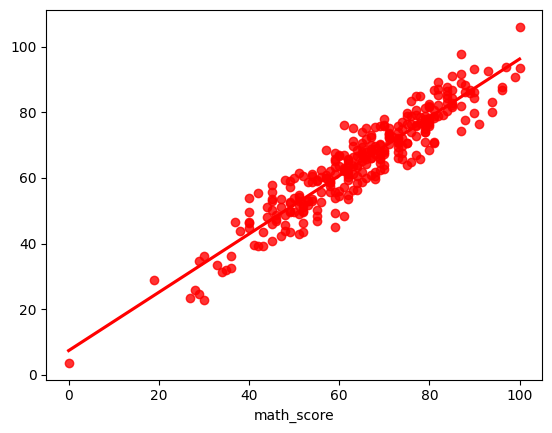

In [49]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')